In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [6]:
df = pd.read_csv(Path('../data/train.csv')).fillna('')
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [3]:
bboxs = np.stack(df['bbox'].apply(lambda x: np.fromstring(x[1:-1], sep=',')))
for i, column in enumerate(['x', 'y', 'w', 'h']):
    df[column] = bboxs[:,i]
df.drop(columns=['bbox'], inplace=True)
df.head()

,image_id,width,height,source,x,y,w,h
0,b6ab77fd7,1024,1024,usask_1,834.0,222.0,56.0,36.0
1,b6ab77fd7,1024,1024,usask_1,226.0,548.0,130.0,58.0
2,b6ab77fd7,1024,1024,usask_1,377.0,504.0,74.0,160.0
3,b6ab77fd7,1024,1024,usask_1,834.0,95.0,109.0,107.0
4,b6ab77fd7,1024,1024,usask_1,26.0,144.0,124.0,117.0


In [4]:
df['source'] = df.source.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   image_id  147793 non-null  object  
 1   width     147793 non-null  int64   
 2   height    147793 non-null  int64   
 3   source    147793 non-null  category
 4   x         147793 non-null  float64 
 5   y         147793 non-null  float64 
 6   w         147793 non-null  float64 
 7   h         147793 non-null  float64 
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 8.0+ MB


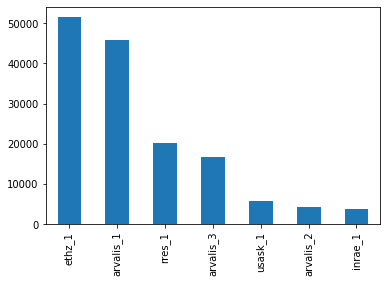

In [5]:
df.source.value_counts().plot(kind='bar')

In [10]:
df[df['source'] == 'inrae_1'].to_csv(Path('../data/validation.csv'))

In [13]:
df[df['source'] != 'inrae_1'].to_csv(Path('../data/trimmed_train.csv'))